In [1]:
import geopandas as gpd
import contextily as cx
import pandas as pd
%matplotlib inline
from shapely.geometry import Polygon, LineString, Point
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import seaborn as sns
from scipy import stats
import scipy as sp
import xarray as xr
from sklearn.linear_model import LinearRegression

In [2]:
df_v1 = pd.read_csv('/Users/zhu/Dropbox/Database/Hera/comb/ground_wrf_chem_berk_vcp_noI_phot_soa_siloxane_ivoc_nald_t2_4km.csv')

df_v0 = pd.read_csv('/Users/zhu/Dropbox/Database/Hera/comb/ground_wrf_chem_berk_vcp_noI_phot_soa_siloxane_ivoc_nald_t2_4km_old_obs.csv')


In [31]:
#df_v1_merge=df_v1.merge(df_v0,on='time')

(array([4.662e+03, 1.637e+03, 2.520e+02, 2.500e+01, 4.000e+00, 3.000e+00,
        5.000e+00, 7.000e+00, 1.000e+00, 1.000e+00]),
 array([1.97509544, 2.37175797, 2.7684205 , 3.16508303, 3.56174556,
        3.95840809, 4.35507061, 4.75173314, 5.14839567, 5.5450582 ,
        5.94172073]),
 <BarContainer object of 10 artists>)

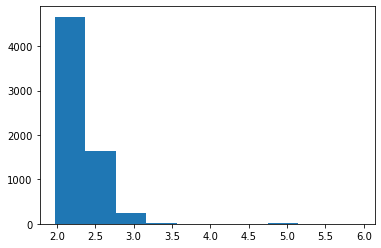

In [37]:
#plt.hist(df_v1_merge['PAN_NOAACIMS_x']/df_v1_merge['PAN_NOAACIMS_y'])

In [60]:
datapath = '/Users/zhu/Dropbox/Database/Hera/comb/'
filename = 'wrf_chem_berk_vcp_noI_phot_soa_siloxane_ivoc_nald_t2_4km.csv'

In [76]:
voc_species = pd.DataFrame(columns = ['col'])

spc = ['CH$_4$', 'ch4','Gas_CH4_Insitu_S_AVMR','CH4_ppb','CH4_NOAA_Picarro_ppb_1min']
voc_species.loc[0,'col'] = spc

spc = ['Methanol', 'moh','x33_0334892273_CH5O_','CH3OH_NOAAPTR_ppbv','CH3OH_NOAAPTR_ppbv_all']
voc_species.loc[1,'col'] = spc

spc = ['Ethanol', 'eoh', 'x47_0491409302_C2H7O_', 'C2H5OH_NOAAPTR_ppbv', 'C2H5OH_NOAAPTR_ppbv_all']
voc_species.loc[2,'col'] = spc

spc = ['Acetaldehyde', 'acd','x45_0334892273_C2H5O_','CH3CHO_NOAAPTR_ppbv','CH3CHO_NOAAPTR_ppbv_all']
voc_species.loc[3,'col'] = spc

spc = ['Acetone', 'act','x59_0491409302_C3H7O_','AcetonePropanal_NOAAPTR_ppbv','AcetonePropanal_NOAAPTR_ppbv_all']
voc_species.loc[4,'col'] = spc

spc = ['Isoprene','iso','x69_0698776245_C5H9_','isoprene_NOAAPTR_ppbv','isoprene_NOAAPTR_ppbv_all']
voc_species.loc[5,'col'] = spc

spc = ['MACR+MVK','C4H6O_model','x71_0491409302_C4H7O_','MVKMAC_NOAAPTR_ppbv','MVKMAC_NOAAPTR_ppbv_all']
voc_species.loc[6,'col'] = spc

spc = ['Monoterpene','Monoterpenes_model','x137_1324768066_C10H17_','monoterpenes_NOAAPTR_ppbv','monoterpenes_NOAAPTR_ppbv_all']
voc_species.loc[7,'col'] = spc

spc = ['Benzene','ben','x79_0542297363_C6H7_','Benzene_NOAAPTR_ppbv','Benzene_NOAAPTR_ppbv_all']
voc_species.loc[8,'col'] = spc

spc = ['Toluene','tol','x93_0698776245_C7H9_','toluene_NOAAPTR_ppbv','toluene_NOAAPTR_ppbv_all']
voc_species.loc[9,'col'] = spc

spc = ['Benzaldehyde','bald','x107_0491409302_C7H7O_','benzaldehyde_NOAAPTR_ppbv','benzaldehyde_NOAAPTR_ppbv_all']
voc_species.loc[10,'col'] = spc

spc = ['Xylene','xyl','x107_0855255127_C8H11_','C8Aromatics_NOAAPTR_ppbv','C8Aromatics_NOAAPTR_ppbv_all']
voc_species.loc[11,'col'] = spc

spc = ['D5-siloxane', 'd5silx', 'x371_1012268066_C10H31O5Si5_', 'D5siloxane_NOAAPTR_ppbv', 'D5siloxane_NOAAPTR_ppbv_all']
voc_species.loc[12,'col'] = spc

spc = ['PCBTF', 'pcbtf','x181_0026397705_C7H4ClF3H_','PCBTF_NOAAPTR_ppbv','PCBTF_NOAAPTR_ppbv_all']
voc_species.loc[13,'col'] = spc


In [77]:
def calc_stat(pair_model, pair_wrf, airborne_obs, mobile_obs, ground_obs):
    print(pair_model)
    nmeb = (np.nanmedian(df_wrfs[0][pair_wrf])-np.nanmedian(df_wrfs[0][airborne_obs]))/np.nanmedian(df_wrfs[0][airborne_obs])
    corr = (df_wrfs[0].loc[:,[airborne_obs,pair_wrf]].corr().loc[airborne_obs,pair_wrf])**2
    print(nmeb,corr)
    nmeb = (np.nanmedian(df_wrfs[1][pair_wrf])-np.nanmedian(df_wrfs[1][mobile_obs]))/np.nanmedian(df_wrfs[1][mobile_obs])
    corr = (df_wrfs[1].loc[:,[mobile_obs,pair_wrf]].corr().loc[mobile_obs,pair_wrf])**2
    print(nmeb,corr)
    nmeb = (np.nanmedian(df_wrfs[2][pair_wrf])-np.nanmedian(df_wrfs[2][ground_obs]))/np.nanmedian(df_wrfs[2][ground_obs])
    corr = (df_wrfs[2].loc[:,[ground_obs,pair_wrf]].corr().loc[ground_obs,pair_wrf])**2
    print(nmeb,corr)

for i in range(voc_species.shape[0]):
    calc_stat(voc_species.loc[i,'col'][0], voc_species.loc[i,'col'][1], voc_species.loc[i,'col'][2], voc_species.loc[i,'col'][3], voc_species.loc[i,'col'][4])
              

CH$_4$
-0.039553644391225384 0.4779790924664252
-0.04467344538765899 0.0032449408766514276
977.4109353995534 0.2447366022307981
Methanol
0.009788816386633651 0.6723747613051465
0.03560655028856289 0.08161881832544648
0.42090787906297217 0.04002934189134797
Ethanol
-0.7532702310016236 0.5207835893220869
-0.415393249668301 0.0755858176276049
-0.29704132481586437 0.32682462629686077
Acetaldehyde
0.47427557102897316 0.28606306299469375
-0.48193818418613393 0.02917848551211383
-0.18156885107724463 0.5988268569758223
Acetone
-0.3298668890418946 0.6522638050516786
-0.1413882057146875 0.022715363537881828
0.01786803309487179 0.24204056951265063
Isoprene
-0.4577954835119717 0.2508330256907034
-0.008832702108255687 0.177628458139343
-0.230633277871293 0.5990856317622053
MACR+MVK
-0.4782258269794513 0.6072076030683087
0.11131736778556608 0.5193823586642637
-0.2805033802262859 0.6425300568399078
Monoterpene
-0.8951076500619739 0.19676423888600184
-0.30566769086199513 2.749777606241137e-05
-0.51332

In [62]:
wrf_comb_species = pd.DataFrame(columns = ['col'])
wrf_comb_species.loc['C4H6O_model','col'] = ['macr','mvk']
wrf_comb_species.loc['Monoterpenes_model','col'] = ['api','lim','eclp']

pair_wrf = []
for i in range(voc_species.shape[0]):
    if '_model' in voc_species.loc[i,'col'][1]:
        pair_wrf = pair_wrf + wrf_comb_species.loc[voc_species.loc[i,'col'][1],'col']
    else:
        pair_wrf.append(voc_species.loc[i,'col'][1])
        
pair_obs = []
for i in range(voc_species.shape[0]):
    pair_obs.append(voc_species.loc[i,'col'][2:])
pair_obs = np.array(pair_obs)

pair_model = []
for i in range(voc_species.shape[0]):
    pair_model.append(voc_species.loc[i,'col'][0])


In [63]:
def read_modeled_vocr(df_wrf_supp, this_df):
    cols = df_wrf_supp.columns
    vocr_cols = [col for col in cols if '_' not in col and col != 'co']
    df_wrf_vocr = df_wrf_supp.loc[:, vocr_cols]
    
    this_df.loc[:,'tot_vocr_model'] = df_wrf_vocr.sum(axis=1)
    this_df.loc[:,'calibrated_vocr_model'] = df_wrf_vocr.loc[:,pair_wrf].sum(axis=1)
    this_df.loc[:,'calibrated_ratio'] = this_df.loc[:,'calibrated_vocr_model']/this_df.loc[:,'tot_vocr_model']
    df_wrf_vocr = df_wrf_vocr.loc[:,pair_wrf] 
    return this_df

def read_vocr(df_wrf_supp, this_df, i_name):
    model_vocr=[col+'_model_vocr' for col in pair_model]
    obs_vocr=[col+'_obs_vocr' for col in pair_model]
    
    df_vocr = pd.DataFrame(columns=model_vocr+obs_vocr)
    
    for i_voc, this_voc in enumerate(pair_model):
        this_obs = voc_species.loc[i_voc,'col'][i_name+2]
        this_wrfs = []
        this_wrf = voc_species.loc[i_voc,'col'][1]
        if '_model' in this_wrf:
            this_wrfs = wrf_comb_species.loc[voc_species.loc[i_voc,'col'][1],'col']
        else:
            this_wrfs.append(this_wrf)
        this_wrf_conc_sum = this_df.loc[:,this_wrfs].sum(axis=1)
        for i_wrf, this_wrf in enumerate(this_wrfs):
            this_conc = this_df.loc[:,this_wrf]
            this_conc_ratio = this_df.loc[:,this_wrf]/this_wrf_conc_sum
            this_koh = df_wrf_supp.loc[:,this_wrf+'_rate']
            this_obs_conc = this_df.loc[:,this_obs]
            
            if i_wrf == 0:
                df_vocr.loc[:,this_voc+'_model_vocr'] = this_conc *1e-9 *2e19 * this_koh 
                df_vocr.loc[:,this_voc+'_obs_vocr'] = this_obs_conc *1e-9 *2e19 * this_koh * this_conc_ratio
            else:
                df_vocr.loc[:,this_voc+'_model_vocr'] = df_vocr.loc[:,this_voc+'_model_vocr']+this_conc *1e-9 *2e19 * this_koh 
                df_vocr.loc[:,this_voc+'_obs_vocr'] = df_vocr.loc[:,this_voc+'_obs_vocr'] + this_obs_conc *1e-9 *2e19 * this_koh * this_conc_ratio
                
            #print(this_voc)
            #print(np.nanmedian(df_vocr.loc[:,this_voc+'_obs_vocr'] ))
    return df_vocr
    
df_wrfs = []
df_vocrs = []
names = ['airborne_','mobile_','ground_']
for i_name, name in enumerate(names):

    #read obs+model
    this_df = pd.read_csv(datapath + name + filename)

    # read vocr file
    df_wrf_supp = pd.read_csv(datapath + name + filename[:-4]+'-vocr.csv')

    #convert the unit of CH4 in airborne and ground
    if name in ['airborne_','ground_']:
        this_df.loc[:,'ch4'] = this_df.loc[:,'ch4']*1e3
        df_wrf_supp.loc[:,'ch4'] = df_wrf_supp.loc[:,'ch4']*1e3
    if name in ['ground_']:
        this_df.loc[:,'CH4_NOAA_Picarro_ppb_1min'] = this_df.loc[:,'CH4_NOAA_Picarro_ppb_1min']
    if name in ['airborne_']:
        this_df.loc[:,'Gas_CH4_Insitu_S_AVMR'] = this_df.loc[:,'Gas_CH4_Insitu_S_AVMR']*1e3
    if name in ['mobile_']:
        this_df.loc[:,'mek'] = this_df.loc[:,'mek']/1e3
        df_wrf_supp.loc[:,'mek'] = df_wrf_supp.loc[:,'mek']/1e3
        
    #read model VOCr
    this_df= read_modeled_vocr(df_wrf_supp, this_df)
    
    # read measured + modeled VOCr
    df_vocr = read_vocr(df_wrf_supp, this_df, i_name)
    model_vocr=[col+'_model_vocr' for col in pair_model]
    obs_vocr=[col+'_obs_vocr' for col in pair_model]

    this_df.loc[:,'calibrated_vocr_obs'] = df_vocr.loc[:,obs_vocr].sum(axis=1)
    this_df.loc[:,'calibrated_vocr_model'] = df_vocr.loc[:,model_vocr].sum(axis=1)
    df_wrfs.append(this_df)
    df_vocrs.append(df_vocr)
    

In [64]:
temp_bin = pd.read_csv('/Users/zhu/Dropbox/Database/Hera/AQS/temp_bin.csv')
print(temp_bin.columns)

Index(['Unnamed: 0', 'time_local', 'date', 'TEMP', 'temp_index',
       'temp_bin_index'],
      dtype='object')


In [65]:
#airborne
df_wrfs[0] = df_wrfs[0].drop(columns=['temp_bin_index']).merge(temp_bin,left_on='date_local',right_on='date')
#mobile
df_wrfs[1] = df_wrfs[1].drop(columns=['temp_bin_index']).merge(temp_bin,on='date')
#ground
df_wrfs[2] = df_wrfs[2].drop(columns=['temp_bin_index']).merge(temp_bin,on='date')

In [66]:
df_wrfs[2]['NOx_LIF'] = df_wrfs[2]['NO_LIF'] + df_wrfs[2]['NO2_LIF']
df_wrfs[2]['CH4_NOAA_Picarro_ppb_1min'] = df_wrfs[2]['CH4_NOAA_Picarro_ppb_1min']/1e3
df_wrfs[2]['CO_NOAA_Picarro_ppb_1min'] = df_wrfs[2]['CO_NOAA_Picarro_ppb_1min']/1e3
df_wrfs[2]['NOx_CIT_AQS'] = df_wrfs[2]['NO_CIT_AQS'] + df_wrfs[2]['NO2_CIT_AQS']
#correct octanal
df_wrfs[0]['x129_1273956299_C8H17O_'] = df_wrfs[0]['x129_1273956299_C8H17O_']*6.75

Text(0.5, 0, '')

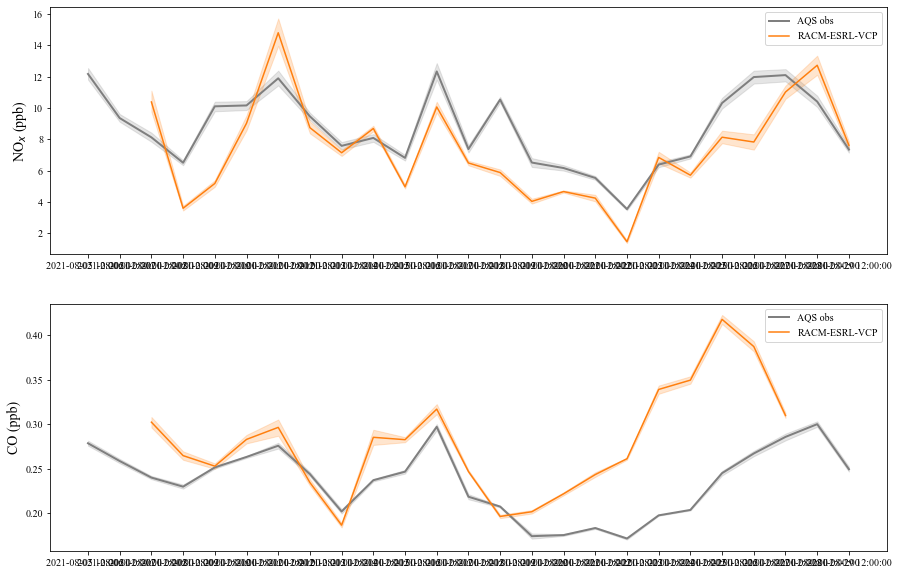

In [67]:
spc = ['NO$_x$ \n (ppb)', 'NOx_model','NOx_obs','NOx_ppbv','NOx_NOAA_NOxCaRD_ppbv_all']


plt.figure(figsize=(15,10))
this_df = df_wrfs[2]
plt.subplot(2,1,1)
sns.lineplot(x='time_local',y='NOx_model',data=this_df,label='AQS obs',color='tab:gray',linewidth=2)
sns.lineplot(x='time_local',y='NOx_NOAA_NOxCaRD_ppbv_all',data=this_df,label='RACM-ESRL-VCP',color='tab:orange')
plt.ylabel('NO$_x$ (ppb)',fontsize=14)
plt.xlabel('')

plt.subplot(2,1,2)
sns.lineplot(x='time_local',y='co',data=this_df,label='AQS obs',color='tab:gray',linewidth=2)
sns.lineplot(x='time_local',y='CO_NOAA_Picarro_ppb_1min',data=this_df,label='RACM-ESRL-VCP',color='tab:orange')
plt.ylabel('CO (ppb)',fontsize=14)
plt.xlabel('')

In [74]:
def concatenate_df(pair_model, pair_wrf, airborne_obs, mobile_obs, ground_obs):
    conc_df = pd.DataFrame()

    #combine airborne
    this_df = pd.DataFrame()
    this_df.loc[:,pair_model] = df_wrfs[0].loc[:,airborne_obs].values
    this_df.loc[:,'temp_obs'] = df_wrfs[0].loc[:,'temp_obs'].values
    this_df.loc[:,'temp_bin_index'] = df_wrfs[0].loc[:,'temp_bin_index'].values
    this_df.loc[:,'data_index'] = 'RECAP Obs'
    this_df.loc[:,'area'] = df_wrfs[0].loc[:,'area'].values
    this_df.loc[:,'cls_indxs'] = df_wrfs[0].loc[:,'cls_indxs'].values
    #this_df.loc[:,'ozone_bias'] = filter_df.loc[:,'ozone_bias'].values
    conc_df = pd.concat([conc_df, this_df])


    this_df = pd.DataFrame()
    this_df.loc[:,pair_model] = df_wrfs[0].loc[:,pair_wrf].values
    this_df.loc[:,'temp_wrf'] = df_wrfs[0].loc[:,'temperature_k_x'].values
    this_df.loc[:,'temp_bin_index'] = df_wrfs[0].loc[:,'temp_bin_index'].values
    this_df.loc[:,'data_index'] = 'RECAP wrf'
    this_df.loc[:,'area'] = df_wrfs[0].loc[:,'area'].values
    this_df.loc[:,'cls_indxs'] = df_wrfs[0].loc[:,'cls_indxs'].values
    #this_df.loc[:,'ozone_bias'] = filter_df.loc[:,'ozone_bias'].values
    conc_df = pd.concat([conc_df, this_df])
    
    if (pair_wrf not in ['NOx_model','co']):
        #combine mobile

        this_df = pd.DataFrame()

        this_df.loc[:,pair_model] = df_wrfs[1].loc[:,mobile_obs].values
        this_df.loc[:,'temp_obs'] = df_wrfs[1].loc[:,'AirTemp_C'].values + 273
        this_df.loc[:,'temp_wrf'] = df_wrfs[1].loc[:,'temperature_k_x'].values
        this_df.loc[:,'temp_bin_index'] = df_wrfs[1].loc[:,'temp_bin_index'].values
        this_df.loc[:,'data_index'] = 'SUNVEX Obs'
        this_df.loc[:,'area'] = df_wrfs[1].loc[:,'area'].values
        this_df.loc[:,'cls_indxs'] = df_wrfs[1].loc[:,'cls_indxs'].values
        conc_df = pd.concat([conc_df, this_df])


        this_df = pd.DataFrame()
        this_df.loc[:,pair_model] = df_wrfs[1].loc[:,pair_wrf].values
        this_df.loc[:,'data_index'] = 'SUNVEX wrf'
        this_df.loc[:,'temp_obs'] = df_wrfs[1].loc[:,'AirTemp_C'].values + 273
        this_df.loc[:,'temp_bin_index'] = df_wrfs[1].loc[:,'temp_bin_index'].values
        this_df.loc[:,'temp_wrf'] = df_wrfs[1].loc[:,'temperature_k_x'].values
        this_df.loc[:,'area'] = df_wrfs[1].loc[:,'area'].values
        this_df.loc[:,'cls_indxs'] = df_wrfs[1].loc[:,'cls_indxs'].values
        conc_df = pd.concat([conc_df, this_df])
        

    #combine ground
    this_df = pd.DataFrame()
    this_df.loc[:,pair_model] = df_wrfs[2].loc[:,ground_obs].values
    this_df.loc[:,'data_index'] = 'SUNVEX Obs'
    this_df.loc[:,'temp_bin_index'] = df_wrfs[2].loc[:,'temp_bin_index'].values
    this_df.loc[:,'temp_wrf'] = df_wrfs[2].loc[:,'temperature_k_x'].values
    this_df.loc[:,'area'] = 'Pasadena'
    this_df.loc[:,'cls_indxs'] = 4.5
    conc_df = pd.concat([conc_df, this_df])
   
    this_df = pd.DataFrame()
    this_df.loc[:,pair_model] = df_wrfs[2].loc[:,pair_wrf].values
    this_df.loc[:,'temp_bin_index'] = df_wrfs[2].loc[:,'temp_bin_index'].values
    this_df.loc[:,'temp_wrf'] = df_wrfs[2].loc[:,'temperature_k_x'].values
    this_df.loc[:,'data_index'] = 'SUNVEX wrf'
    this_df.loc[:,'area'] = 'Pasadena'
    this_df.loc[:,'cls_indxs'] = 4.5
    conc_df = pd.concat([conc_df, this_df])
    
    conc_df.dropna(subset=pair_model)
    return conc_df


In [72]:
#from left to right 
#pair_model#airborne_obs, airborne_wrf, mobile_obs, mobile_wrf, ground_obs, ground_wrf
species = pd.DataFrame(columns = ['col'])

#'NOx_CIT_AQS'
spc = ['NO$_x$ \n (ppb)', 'NOx_model','NOx_obs','NOx_ppbv','NOx_NOAA_NOxCaRD_ppbv_all']
species.loc[0,'col'] = spc

spc = ['CO \n (ppm)', 'co','Gas_CO_Insitu_S_AVMR','CO_ppb','CO_NOAA_Picarro_ppb_1min']
species.loc[1,'col'] = spc

spc = ['D5-siloxane \n (ppb)', 'd5silx', 'x371_1012268066_C10H31O5Si5_', 'D5siloxane_NOAAPTR_ppbv', 'D5siloxane_NOAAPTR_ppbv_all']
species.loc[2,'col'] = spc

spc = ['PCBTF \n  (ppb)', 'pcbtf','x181_0026397705_C7H4ClF3H_','PCBTF_NOAAPTR_ppbv','PCBTF_NOAAPTR_ppbv_all']
species.loc[3,'col'] = spc

spc = ['Calibrated VOC$_r$ \n (s$^{-1}$)', 'calibrated_vocr_model','calibrated_vocr_obs','calibrated_vocr_obs','calibrated_vocr_obs']
species.loc[4,'col'] = spc


NO$_x$ 
 (ppb)
-0.2928071710791573 0.5518624894188607
0.29305506880915805 0.17836472797846906
CO 
 (ppm)
-0.1990644154461 0.6854239471078231
-0.10642432132310235 0.09849406007414982
D5-siloxane 
 (ppb)
0.5944781916841019 0.5568144703985012
1.1812947535956329 0.2659466471766318
1.6751007108638651 0.6125686089100277
PCBTF 
  (ppb)
-0.053463406524315124 0.3189426310668715
0.43093214591030643 0.003773487952996942
1.192961109816566 0.1261632624052451
Calibrated VOC$_r$ 
 (s$^{-1}$)
-0.3485307878932477 0.5753569446750778
-0.2630981408367066 0.026188977916969232
0.03523513622905424 0.2794297874580063


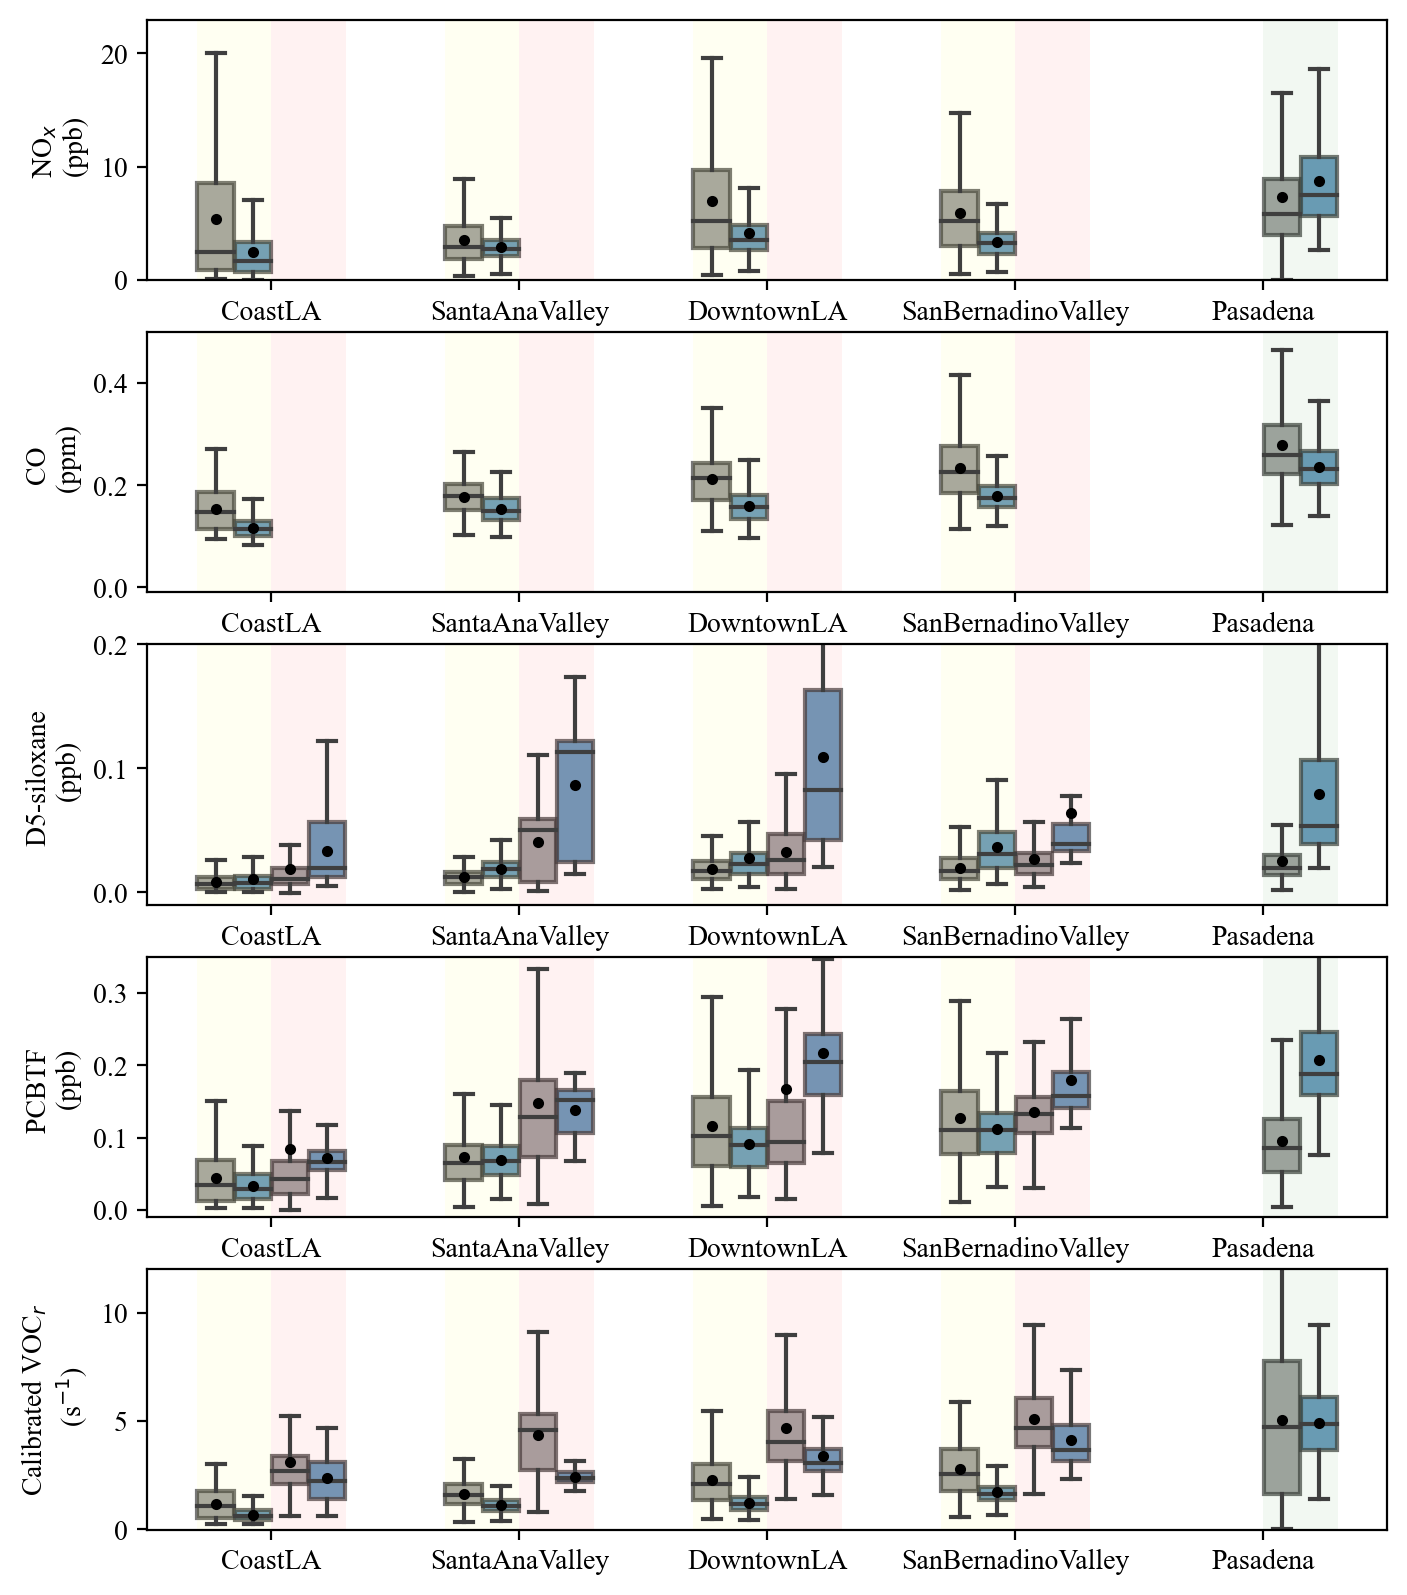

In [75]:
box_colors = ['tab:gray','tab:blue','tab:gray','tab:blue','tab:gray','tab:blue']
labels = ['SUNVEX Mobile', 'RACM2_BERK_SILX_IVOC 12km', 'RACM2_BERK_SILX_IVOC 4km']
fig, axs = plt.subplots(5,1,figsize=(8,10),dpi=200)

ymaxs = [23,0.5,0.2,0.35,12]

for i, i_spc in enumerate([0,1,2,3,4]):
    axs[i].fill_between([-0.3,0],[-0.01,-0.01],[ymaxs[i],ymaxs[i]], facecolor='yellow',edgecolor='None',alpha=0.05)
    axs[i].fill_between([0,0.3],[-0.01,-0.01],[ymaxs[i],ymaxs[i]], facecolor='red',edgecolor='None',alpha=0.05)
    
    axs[i].fill_between([0.7,1],[-0.01,-0.01],[ymaxs[i],ymaxs[i]], facecolor='yellow',edgecolor='None',alpha=0.05)
    axs[i].fill_between([1,1.3],[-0.01,-0.01],[ymaxs[i],ymaxs[i]], facecolor='red',edgecolor='None',alpha=0.05)
    
    
    axs[i].fill_between([1.7,2],[-0.01,-0.01],[ymaxs[i],ymaxs[i]], facecolor='yellow',edgecolor='None',alpha=0.05)
    axs[i].fill_between([2,2.3],[-0.01,-0.01],[ymaxs[i],ymaxs[i]], facecolor='red',edgecolor='None',alpha=0.05)
    
    axs[i].fill_between([2.7,3],[-0.01,-0.01],[ymaxs[i],ymaxs[i]], facecolor='yellow',edgecolor='None',alpha=0.05)
    axs[i].fill_between([3,3.3],[-0.01,-0.01],[ymaxs[i],ymaxs[i]], facecolor='red',edgecolor='None',alpha=0.05)
    
    axs[i].fill_between([4,4.3],[-0.01,-0.01],[ymaxs[i],ymaxs[i]], facecolor='green',edgecolor='None',alpha=0.05)
    conc_df = concatenate_df(species.loc[i,'col'][0], species.loc[i,'col'][1], species.loc[i,'col'][2], species.loc[i,'col'][3], species.loc[i,'col'][4])

    #plt.figure(figsize=(6,5))
    bplot = sns.boxplot(x='area',y=species.loc[i,'col'][0], hue='data_index', data=conc_df.query('cls_indxs<5'), 
                showfliers = False, width=0.6, palette=box_colors, boxprops=dict(alpha=.7), showmeans=True,
                    meanprops={"marker":"o","markerfacecolor":"black", "markeredgecolor":"black","markersize":"3"},
                        order = [ 'CoastLA', 'SantaAnaValley', 'DowntownLA', 'SanBernadinoValley', 'Pasadena'], ax=axs[i])

    bplot.get_legend().remove()
    plt.rcParams["font.family"] = "Times New Roman"
    axs[i].set_ylabel(species.loc[i,'col'][0], fontsize=10)
    axs[i].set_ylim([-0.01,ymaxs[i]])
    axs[i].tick_params(axis='x', labelsize= 10)
    axs[i].set_xlabel('')

In [32]:
df_wrfs[0]

In [16]:
this_df.loc['RECAP Obs'][species.loc[i,'col'][0]]['median']

1.91078563597165

In [17]:
3.615734/4.363218-1

-0.1713148414770933

In [18]:
stat_df = conc_df.groupby(['area','data_index']).agg(['median']).reset_index()
stat_df.columns

MultiIndex([(                            'area',       ''),
            (                      'data_index',       ''),
            ('Calibrated VOC$_r$ \n (s$^{-1}$)', 'median'),
            (                        'temp_obs', 'median'),
            (                  'temp_bin_index', 'median'),
            (                       'cls_indxs', 'median'),
            (                        'temp_wrf', 'median')],
           )

In [19]:
stat_df[stat_df['data_index']=='RECAP wrf']['Calibrated VOC$_r$ \n (s$^{-1}$)', 'median'].values/stat_df[stat_df['data_index']=='RECAP Obs']['Calibrated VOC$_r$ \n (s$^{-1}$)', 'median'].values -1



array([-0.4237941 , -0.42894472, -0.3512651 , -0.32508527])

In [20]:
stat_df[stat_df['data_index']=='SUNVEX wrf']

,area,data_index,Calibrated VOC$_r$ \n (s$^{-1}$),temp_obs,temp_bin_index,cls_indxs,temp_wrf
,,,median,median,median,median,median
3,CoastLA,SUNVEX wrf,2.218344,297.290,1.0,3.0,300.712720
7,DowntownLA,SUNVEX wrf,3.070002,298.500,1.0,0.0,300.788932
9,Outside,SUNVEX wrf,4.125200,299.395,1.0,5.0,299.741633
11,Pasadena,SUNVEX wrf,4.870903,NaN,1.0,4.5,301.507785
15,SanBernadinoValley,SUNVEX wrf,3.667063,303.660,1.0,1.0,304.792941
19,SantaAnaValley,SUNVEX wrf,2.363009,293.130,1.0,2.0,296.705211


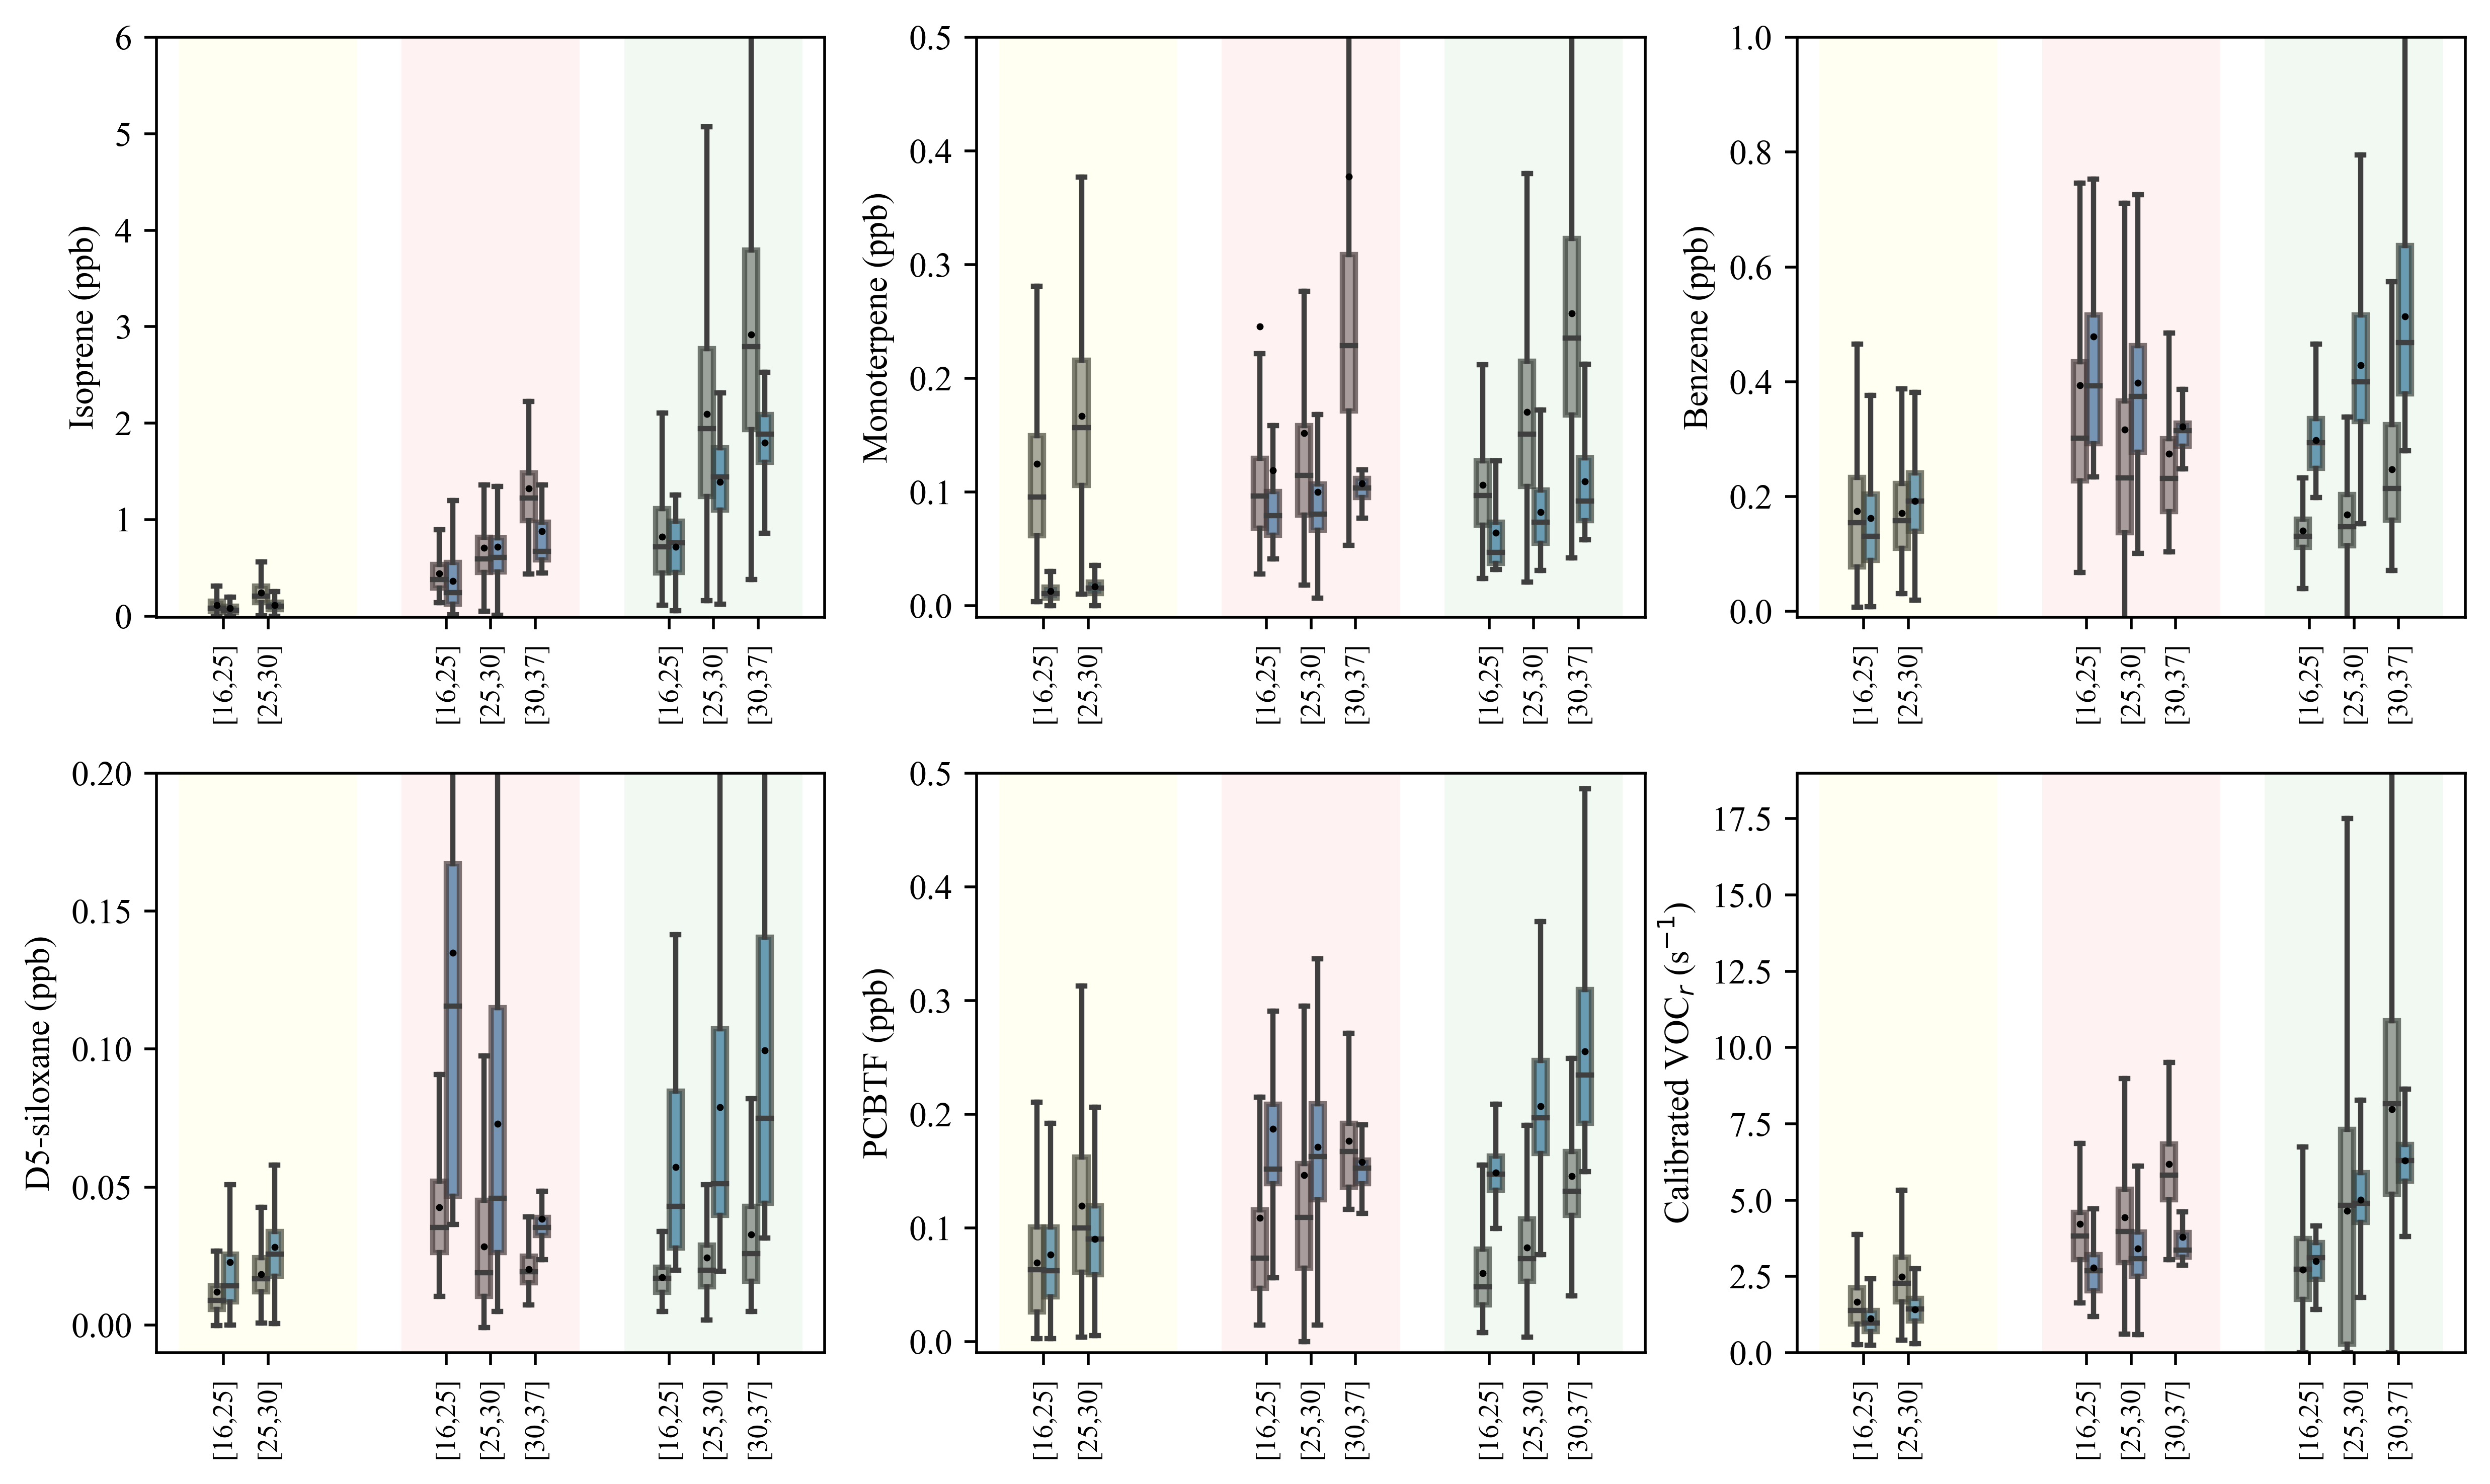

In [21]:
def concatenate_df(pair_model, pair_wrf, airborne_obs, mobile_obs, ground_obs):
    conc_df = pd.DataFrame()

    #combine airborne
    this_df = pd.DataFrame()
    this_df.loc[:,pair_model] = df_wrfs[0].loc[:,airborne_obs].values
    this_df.loc[:,'temp_obs'] = df_wrfs[0].loc[:,'temp_obs'].values
    this_df.loc[:,'temp_bin_index'] = df_wrfs[0].loc[:,'temp_bin_index'].values-5
    this_df.loc[:,'obs']='RECAP'
    this_df.loc[:,'data_index'] = 'obs'
    this_df.loc[:,'area'] = df_wrfs[0].loc[:,'area'].values
    this_df.loc[:,'cls_indxs'] = df_wrfs[0].loc[:,'cls_indxs'].values
    #this_df.loc[:,'ozone_bias'] = filter_df.loc[:,'ozone_bias'].values
    conc_df = pd.concat([conc_df, this_df])


    this_df = pd.DataFrame()
    this_df.loc[:,pair_model] = df_wrfs[0].loc[:,pair_wrf].values
    this_df.loc[:,'temp_wrf'] = df_wrfs[0].loc[:,'temperature_k_x'].values
    this_df.loc[:,'temp_bin_index'] = df_wrfs[0].loc[:,'temp_bin_index'].values-5
    this_df.loc[:,'data_index'] = 'wrf'
    this_df.loc[:,'obs']='RECAP'
    this_df.loc[:,'area'] = df_wrfs[0].loc[:,'area'].values
    this_df.loc[:,'cls_indxs'] = df_wrfs[0].loc[:,'cls_indxs'].values
    #this_df.loc[:,'ozone_bias'] = filter_df.loc[:,'ozone_bias'].values
    conc_df = pd.concat([conc_df, this_df])
    
    if (pair_wrf not in ['NOx_model','co']):
        #combine mobile

        this_df = pd.DataFrame()

        this_df.loc[:,pair_model] = df_wrfs[1].loc[:,mobile_obs].values
        this_df.loc[:,'temp_obs'] = df_wrfs[1].loc[:,'AirTemp_C'].values + 273
        this_df.loc[:,'temp_wrf'] = df_wrfs[1].loc[:,'temperature_k_x'].values
        this_df.loc[:,'temp_bin_index'] = df_wrfs[1].loc[:,'temp_bin_index'].values
        this_df.loc[:,'obs']='SUNVEX Mobile'
        this_df.loc[:,'data_index'] = 'obs'
        this_df.loc[:,'area'] = df_wrfs[1].loc[:,'area'].values
        this_df.loc[:,'cls_indxs'] = df_wrfs[1].loc[:,'cls_indxs'].values
        conc_df = pd.concat([conc_df, this_df])


        this_df = pd.DataFrame()
        this_df.loc[:,pair_model] = df_wrfs[1].loc[:,pair_wrf].values
        this_df.loc[:,'obs']='SUNVEX Mobile'
        this_df.loc[:,'data_index'] = 'wrf'
        this_df.loc[:,'temp_obs'] = df_wrfs[1].loc[:,'AirTemp_C'].values + 273
        this_df.loc[:,'temp_bin_index'] = df_wrfs[1].loc[:,'temp_bin_index'].values
        this_df.loc[:,'temp_wrf'] = df_wrfs[1].loc[:,'temperature_k_y'].values
        this_df.loc[:,'area'] = df_wrfs[1].loc[:,'area'].values
        this_df.loc[:,'cls_indxs'] = df_wrfs[1].loc[:,'cls_indxs'].values
        conc_df = pd.concat([conc_df, this_df])
    
    #combine ground
    this_df = pd.DataFrame()
    this_df.loc[:,pair_model] = df_wrfs[2].loc[:,ground_obs].values
    this_df.loc[:,'obs']='SUNVEX Ground'
    this_df.loc[:,'data_index'] = 'obs'
    this_df.loc[:,'temp_bin_index'] = df_wrfs[2].loc[:,'temp_bin_index'].values+5
    this_df.loc[:,'temp_wrf'] = df_wrfs[2].loc[:,'temperature_k_y'].values
    this_df.loc[:,'area'] = 'Pasadena'
    this_df.loc[:,'cls_indxs'] = 4.5
    conc_df = pd.concat([conc_df, this_df])
   
    this_df = pd.DataFrame()
    this_df.loc[:,pair_model] = df_wrfs[2].loc[:,pair_wrf].values
    this_df.loc[:,'temp_bin_index'] = df_wrfs[2].loc[:,'temp_bin_index'].values+5
    this_df.loc[:,'temp_wrf'] = df_wrfs[2].loc[:,'temperature_k_y'].values
    this_df.loc[:,'obs']='SUNVEX Ground'
    this_df.loc[:,'data_index'] = 'wrf'
    this_df.loc[:,'area'] = 'Pasadena'
    this_df.loc[:,'cls_indxs'] = 4.5
    conc_df = pd.concat([conc_df, this_df])
    return conc_df

box_colors = ['tab:gray','tab:blue','tab:gray','tab:blue','tab:gray','tab:blue']
labels = ['SUNVEX Mobile', 'RACM2_BERK_SILX_IVOC 12km', 'RACM2_BERK_SILX_IVOC 4km']

#from left to right 
#pair_model#airborne_obs, airborne_wrf, mobile_obs, mobile_wrf, ground_obs, ground_wrf
species = pd.DataFrame(columns = ['col'])

spc = ['Isoprene (ppb)','iso','x69_0698776245_C5H9_','isoprene_NOAAPTR_ppbv','isoprene_NOAAPTR_ppbv_all']
species.loc[0,'col'] = spc

spc = ['Monoterpene (ppb)','Monoterpenes_model','x137_1324768066_C10H17_','monoterpenes_NOAAPTR_ppbv','monoterpenes_NOAAPTR_ppbv_all']
species.loc[1,'col'] = spc

spc = ['Benzene (ppb)','ben','x79_0542297363_C6H7_','Benzene_NOAAPTR_ppbv','Benzene_NOAAPTR_ppbv_all']
species.loc[2,'col'] = spc


spc = ['D5-siloxane (ppb)', 'd5silx', 'x371_1012268066_C10H31O5Si5_', 'D5siloxane_NOAAPTR_ppbv', 'D5siloxane_NOAAPTR_ppbv_all']
species.loc[3,'col'] = spc

spc = ['PCBTF (ppb)', 'pcbtf','x181_0026397705_C7H4ClF3H_','PCBTF_NOAAPTR_ppbv','PCBTF_NOAAPTR_ppbv_all']
species.loc[4,'col'] = spc

spc = ['Calibrated VOC$_r$ (s$^{-1}$)', 'calibrated_vocr_model','calibrated_vocr_obs','calibrated_vocr_obs','calibrated_vocr_obs']
species.loc[5,'col'] = spc

fig, axs = plt.subplots(2,3,figsize=(10,6),dpi=500)

ymaxs = [6,0.5,1,0.2,0.50,19]

for i, i_spc in enumerate([0,1,2,3,4,5]):
    i_indx = int(i/3)
    j_indx = i - int(i/3)*3
    axs[i_indx,j_indx].fill_between([-5+5,-1+5],[-0.01,-0.01],[ymaxs[i],ymaxs[i]], facecolor='yellow',edgecolor='None',alpha=0.05)
    axs[i_indx,j_indx].fill_between([0+5,4+5],[-0.01,-0.01],[ymaxs[i],ymaxs[i]], facecolor='red',edgecolor='None',alpha=0.05)
    
    axs[i_indx,j_indx].fill_between([5+5,9+5],[-0.01,-0.01],[ymaxs[i],ymaxs[i]], facecolor='green',edgecolor='None',alpha=0.05)
    
    conc_df = concatenate_df(species.loc[i,'col'][0], species.loc[i,'col'][1], species.loc[i,'col'][2], species.loc[i,'col'][3], species.loc[i,'col'][4])
    conc_df = conc_df.query('cls_indxs<5')
    #plt.figure(figsize=(6,5))
    bplot = sns.boxplot(x='temp_bin_index',y=species.loc[i,'col'][0], hue='data_index', data=conc_df, 
                showfliers = False, order=range(-6,9) ,width=0.6,palette=box_colors, boxprops=dict(alpha=.7), showmeans=True,
                    meanprops={"marker":"o","markerfacecolor":"black", "markeredgecolor":"black","markersize":"1"}, ax=axs[i_indx,j_indx])

    #ax2 = axs[i].twinx()
    #sns.scatterplot(x='temp_bin_index',y='temp_wrf', data=conc_df.groupby('temp_bin_index').median(),ax=ax2)
    med_temp = conc_df.groupby('temp_bin_index').mean().reset_index()
    #axs[i_indx,j_indx].set_xticks(med_temp['temp_bin_index']+6, (np.rint(med_temp['temp_wrf'])).astype(int), fontsize=10,rotation=90)
    axs[i_indx,j_indx].set_xticks(med_temp['temp_bin_index']+6,['[16,25]','[25,30]','[16,25]','[25,30]','[30,37]','[16,25]','[25,30]','[30,37]'], fontsize=8,rotation=90)
    
    bplot.get_legend().remove()
    #plt.rcParams["font.family"] = "Times New Roman"
    axs[i_indx,j_indx].set_ylabel(species.loc[i,'col'][0], fontsize=10)
    axs[i_indx,j_indx].set_ylim([-0.01,ymaxs[i]])
    #axs[i].tick_params(axis='x', labelsize= 10)
    axs[i_indx,j_indx].set_xlabel('')
 #, order=range(-10,10)   
plt.tight_layout()
    

In [22]:
conc_df.groupby(['temp_bin_index','data_index']).median()

Calibrated VOC$_r$ (s$^{-1}$)    temp_obs  \
temp_bin_index data_index                                              
-5             obs                              1.386115  291.048534   
               wrf                              0.966458         NaN   
-4             obs                              2.274046  295.096712   
               wrf                              1.434668         NaN   
 0             obs                              3.826733  292.530000   
               wrf                              2.676572  292.530000   
 1             obs                              3.974907  298.980000   
               wrf                              3.073426  298.980000   
 2             obs                              5.820108  307.285000   
               wrf                              3.361017  307.285000   
 5             obs                              2.730696         NaN   
               wrf                              3.119707         NaN   
 6             obs                              4.820544         NaN   
               wrf                              4.897510         NaN   
 7             obs                              8.160816         NaN   
               wrf                              6.302981         NaN   

                           cls_indxs    temp_wrf  
temp_bin_index data_index                         
-5             obs               1.0         NaN  
               wrf               1.0  292.861341  
-4             obs               1.0         NaN  
               wrf               1.0  296.919398  
 0             obs               1.0  294.102405  
               wrf               1.0  296.311406  
 1             obs               1.0  301.548813  
               wrf               1.0  301.977182  
 2             obs               1.0  308.907521  
               wrf               1.0  308.547550  
 5             obs               4.5  297.451780  
               wrf               4.5  297.451780  
 6             obs               4.5  302.523852  
               wrf               4.5  302.523852  
 7             obs               4.5  303.455447  
               wrf               4.5  303.455447

In [23]:
model_vocr=[col+'_model_vocr' for col in pair_model]
obs_vocr=[col+'_obs_vocr' for col in pair_model]

Text(0, 0.5, 'Calibrated VOC$_r$ (s$^{-1}$)')

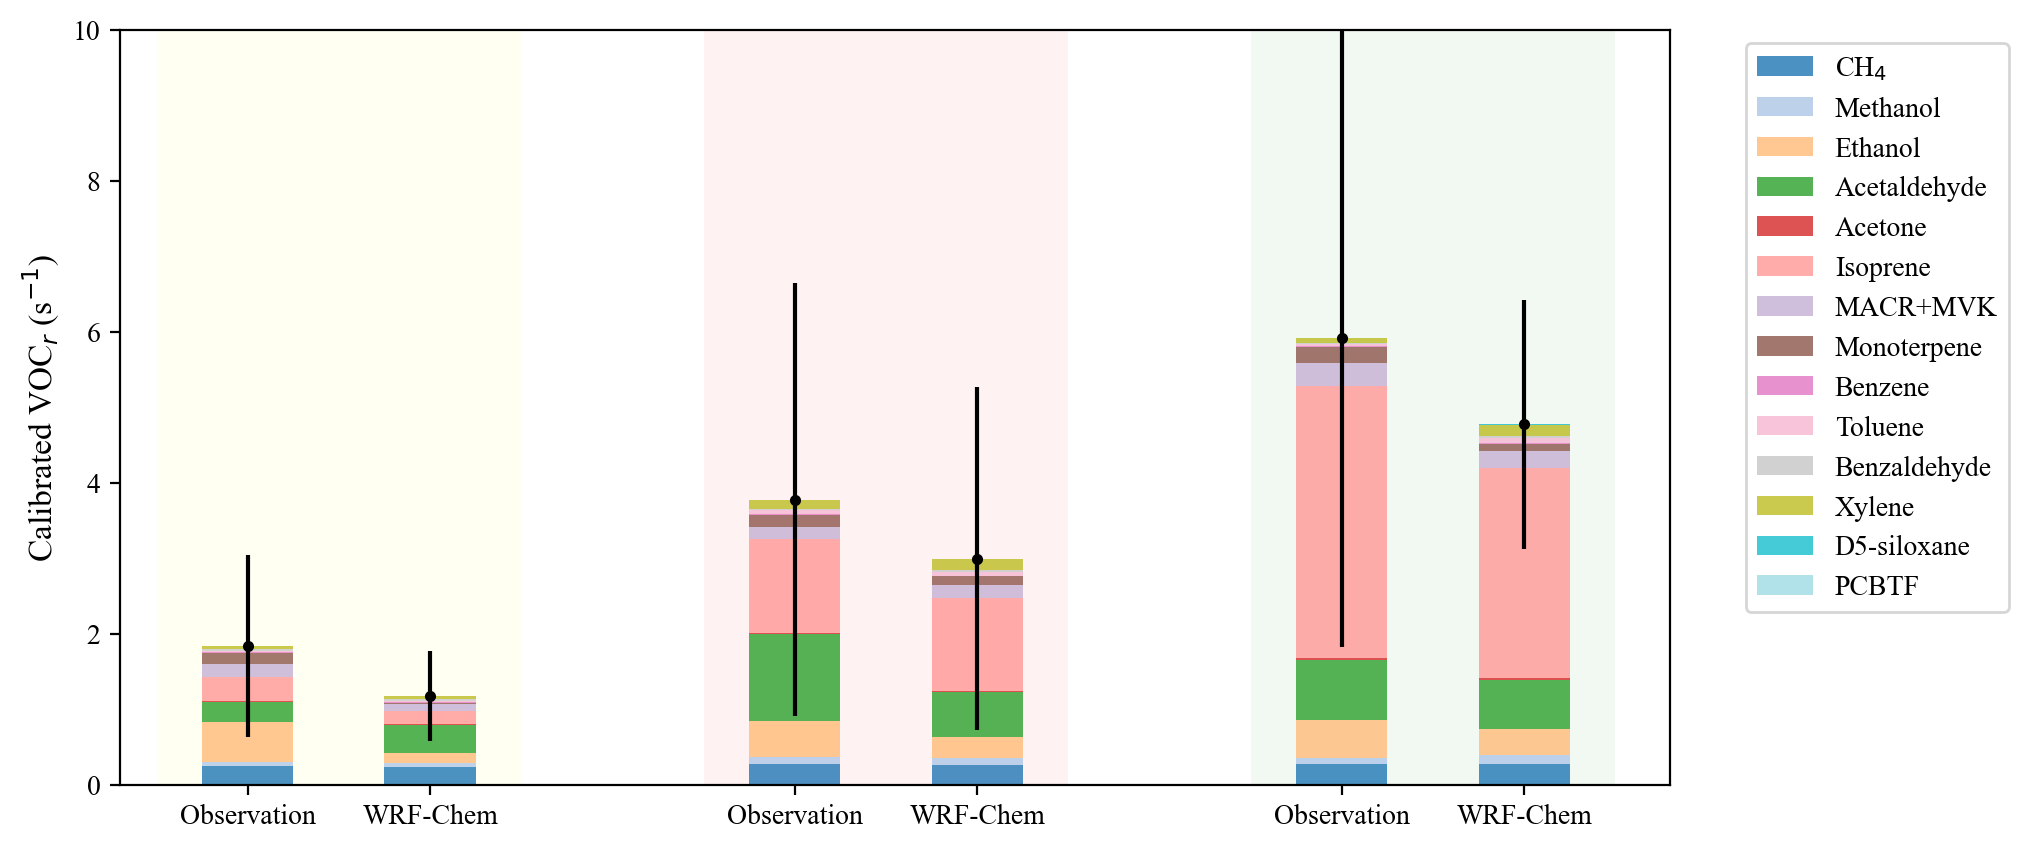

In [24]:
names = ['RECAP','SUNVEX Mobile','SUNVEX Ground']
ymaxs= [2,4,10]
concat_mean_df = pd.DataFrame()
concat_std_df = []
concat_25_df = []
concat_75_df = []
obs_labels = [-2,1,4]
wrf_labels = [-1,2,5]
for i in range(3):
    this_wrf = pd.DataFrame()
    for i_var, this_var in enumerate(pair_model):
        this_wrf.loc[obs_labels[i],this_var] = np.nanmedian(df_vocrs[i].loc[:,this_var+'_obs_vocr'])
        this_wrf.loc[wrf_labels[i],this_var] = np.nanmedian(df_vocrs[i].loc[:,this_var+'_model_vocr'])
        this_wrf.loc[wrf_labels[i]+1,this_var] = np.nan
    concat_mean_df = pd.concat([concat_mean_df,this_wrf])
    concat_std_df.append(np.nanstd(df_vocrs[i].loc[:,obs_vocr].sum(axis=1)))
    concat_std_df.append(np.nanstd(df_vocrs[i].loc[:,model_vocr].sum(axis=1)))
    
    concat_25_df.append(np.nanquantile(df_vocrs[i].loc[:,obs_vocr].sum(axis=1),0.25))
    concat_25_df.append(np.nanquantile(df_vocrs[i].loc[:,model_vocr].sum(axis=1),0.25))
    
    concat_75_df.append(np.nanquantile(df_vocrs[i].loc[:,obs_vocr].sum(axis=1),0.75))
    concat_75_df.append(np.nanquantile(df_vocrs[i].loc[:,model_vocr].sum(axis=1),0.75))
    
mean_df = concat_mean_df.sum(axis=1)   
fig, axs = plt.subplots(1,1,figsize=(10,5),dpi=200)
plt.fill_between([-0.5,1.5],[-0.01,-0.01],[ymaxs[i],ymaxs[i]], facecolor='yellow',edgecolor='None',alpha=0.05)
plt.fill_between([2.5,4.5],[-0.01,-0.01],[ymaxs[i],ymaxs[i]], facecolor='red',edgecolor='None',alpha=0.05)
    
plt.fill_between([5.5,7.5],[-0.01,-0.01],[ymaxs[i],ymaxs[i]], facecolor='green',edgecolor='None',alpha=0.05)
    
concat_mean_df.plot(kind='bar', stacked=True,ax=axs, edgecolor='none',colormap='tab20',alpha=0.8, rot=0)
plt.errorbar(np.array([-2,-1,1,2,4,5])+2, mean_df[mean_df>0].values, yerr=concat_std_df, fmt='.',color='k')

axs.set_xticks(np.array([-2,-1,1,2,4,5])+2, ['Observation','WRF-Chem']*3, fontsize=10)

plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.xlim([-0.7,7.8])
plt.ylim([0,10])
plt.ylabel('Calibrated VOC$_r$ (s$^{-1}$)',fontsize=12)

In [25]:
df_sum = concat_mean_df.sum(axis=1)
print((df_sum[-1]-df_sum[-2])/df_sum[-2])
print((df_sum[2]-df_sum[1])/df_sum[1])
print((df_sum[5]-df_sum[4])/df_sum[4])

-0.3623254404272574
-0.2062752219827347
-0.1927118777758152


In [26]:
(concat_mean_df.loc[-1,:] - concat_mean_df.loc[-2,:])/concat_mean_df.loc[-2,:]

CH$_4$         -0.043028
Methanol        0.005949
Ethanol        -0.753082
Acetaldehyde    0.463759
Acetone        -0.329867
Isoprene       -0.459461
MACR+MVK       -0.481527
Monoterpene    -0.894898
Benzene         0.059862
Toluene        -0.049520
Benzaldehyde    0.054859
Xylene         -0.091937
D5-siloxane     0.594478
PCBTF          -0.053463
dtype: float64

In [29]:
concat_mean_df.loc[-1,:].corr(concat_mean_df.loc[-2,:])

0.6523171592796113

In [27]:
(concat_mean_df.loc[2,:] - concat_mean_df.loc[1,:])/concat_mean_df.loc[1,:]

CH$_4$         -0.046484
Methanol        0.033733
Ethanol        -0.415021
Acetaldehyde   -0.482774
Acetone        -0.141388
Isoprene       -0.014360
MACR+MVK        0.115565
Monoterpene    -0.301717
Benzene         0.462241
Toluene        -0.119364
Benzaldehyde    1.187437
Xylene          0.232205
D5-siloxane     1.181295
PCBTF           0.430932
dtype: float64

In [28]:
(concat_mean_df.loc[5,:] - concat_mean_df.loc[4,:])/concat_mean_df.loc[4,:]

CH$_4$         -0.013055
Methanol        0.412394
Ethanol        -0.296788
Acetaldehyde   -0.183298
Acetone         0.017868
Isoprene       -0.228690
MACR+MVK       -0.275683
Monoterpene    -0.527142
Benzene         1.497604
Toluene         0.766020
Benzaldehyde    3.056044
Xylene          1.350361
D5-siloxane     1.675101
PCBTF           1.192961
dtype: float64

In [47]:
df_wrfs[2].loc[:,'O3_NOAA_NOxCaRD_ppbv_all'].describe()

count    10747.000000
mean        42.079292
std         18.297849
min          1.785000
25%         28.288500
50%         39.913000
75%         55.354500
max         89.492000
Name: O3_NOAA_NOxCaRD_ppbv_all, dtype: float64

In [48]:
df_wrfs[2].loc[:,'O3_CIT_AQS'].describe()

count    16367.000000
mean        54.168913
std         17.002920
min         14.400000
25%         41.200000
50%         52.900000
75%         67.200000
max        103.300000
Name: O3_CIT_AQS, dtype: float64

-0.726808018273567
-0.24550094517958415
0.029473275770760657
0.09416351750252286
0.15657077137646921
-0.9999999999999994


Text(0.5, 0, '')

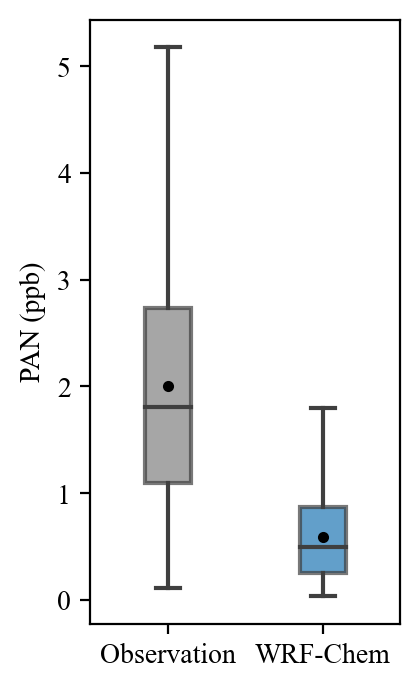

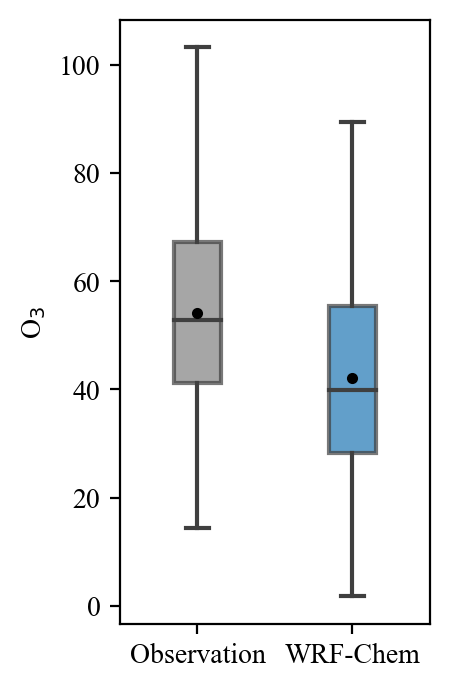

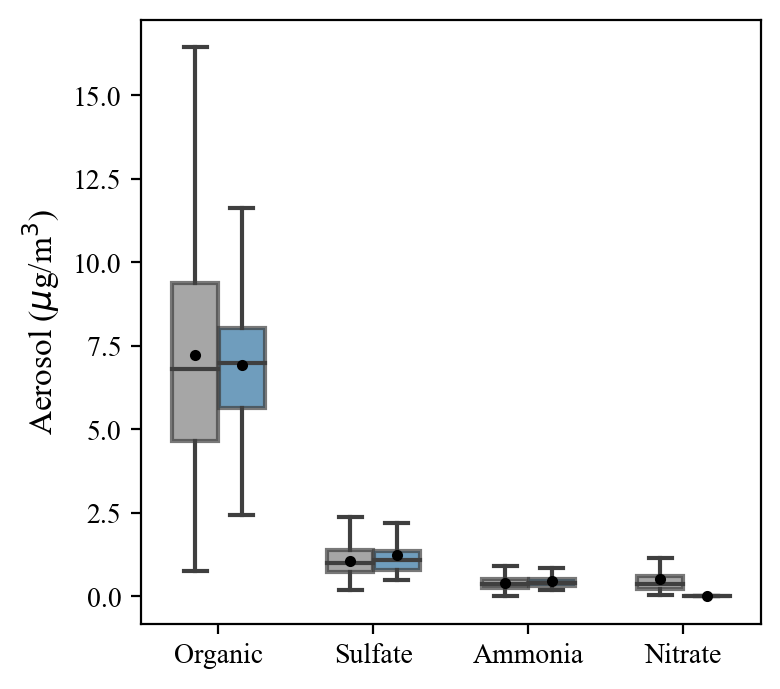

In [78]:
#ground measurements only
def concatenate_ground_df(pair_obs, pair_wrf, pair_model):
    conc_df = pd.DataFrame()
    this_df = pd.DataFrame()
    this_df.loc[:,pair_model] = df_wrfs[2].loc[:,pair_obs].values
    this_df.loc[:,'tag'] = 'Observation'
    this_df.loc[:,'data_index'] = 0
    this_df.loc[:,'temp_bin_index'] = df_wrfs[2].loc[:,'temp_bin_index'].values
    this_df.loc[:,'temp_wrf'] = df_wrfs[2].loc[:,'temperature_k_x'].values
    conc_df = pd.concat([conc_df, this_df])

    this_df = pd.DataFrame()
    this_df.loc[:,pair_model] = df_wrfs[2].loc[:,pair_wrf].values
    this_df.loc[:,'tag'] = 'WRF-Chem'
    this_df.loc[:,'data_index'] = 2
    this_df.loc[:,'temp_bin_index'] = df_wrfs[2].loc[:,'temp_bin_index'].values
    this_df.loc[:,'temp_wrf'] = df_wrfs[2].loc[:,'temperature_k_x'].values
    conc_df = pd.concat([conc_df, this_df])
    
    conc_df.dropna(subset=pair_model)
    return conc_df

species = pd.DataFrame(columns = ['col'])

spc = ['Organic aerosol ($\mu$g/m$^3$)','AerComp_OrganicAerosol_PM1','organic_model']
species.loc[0,'col'] = spc

spc = ['Sulfate ($\mu$g/m$^3$)','AerComp_Sulfate_PM1','so4_model']
species.loc[1,'col'] = spc

spc = ['Ammonia ($\mu$g/m$^3$)','AerComp_Ammonium_PM1','nh4_model']
species.loc[2,'col'] = spc

spc = ['Nitrate ($\mu$g/m$^3$)','AerComp_Nitrate_PM1','no3_model']
species.loc[3,'col'] = spc

spc = ['PAN (ppb)','PAN_NOAACIMS','pan']
species.loc[4,'col'] = spc

spc = ['O$_3$','O3_CIT_AQS','O3_NOAA_NOxCaRD_ppbv_all']
species.loc[5,'col'] = spc

#PAN
fig, axs = plt.subplots(1,1,figsize=(2,4),dpi=200)
pair_obs = species.loc[4,'col'][1]
pair_wrf = species.loc[4,'col'][2]
pair_model = species.loc[4,'col'][0]
conc_df = concatenate_ground_df(pair_obs, pair_wrf, pair_model)
this_df = conc_df.groupby('tag').median()
diff = (this_df.loc['WRF-Chem'][pair_model]-this_df.loc['Observation'][pair_model])/this_df.loc['Observation'][pair_model]
print(diff)
bplot = sns.boxplot(x='tag',y=pair_model, data=conc_df,showmeans=True,
                    meanprops={"marker":"o","markerfacecolor":"black", "markeredgecolor":"black","markersize":"3"},
                    showfliers = False, width=0.3,ax=axs, boxprops=dict(alpha=.7))
axs.set_xlabel('')
box_colors = ['gray','tab:blue']
if len(bplot.patches) == 2:
    for i in range(len(bplot.patches)):
        mybox = bplot.patches[i]
        # Change the appearance of that box
        mybox.set_facecolor(box_colors[i])
        #mybox.set_alpha(0.6)
            
#O3
fig, axs = plt.subplots(1,1,figsize=(2,4),dpi=200)
pair_obs = species.loc[5,'col'][1]
pair_wrf = species.loc[5,'col'][2]
pair_model = species.loc[5,'col'][0]
conc_df = concatenate_ground_df(pair_obs, pair_wrf, pair_model)
this_df = conc_df.groupby('tag').median()
diff = (this_df.loc['WRF-Chem'][pair_model]-this_df.loc['Observation'][pair_model])/this_df.loc['Observation'][pair_model]
print(diff)
bplot = sns.boxplot(x='tag',y=pair_model, data=conc_df,showmeans=True,
                    meanprops={"marker":"o","markerfacecolor":"black", "markeredgecolor":"black","markersize":"3"},
                    showfliers = False, width=0.3,ax=axs, boxprops=dict(alpha=.7))
axs.set_xlabel('')
box_colors = ['gray','tab:blue']
if len(bplot.patches) == 2:
    for i in range(len(bplot.patches)):
        mybox = bplot.patches[i]
        # Change the appearance of that box
        mybox.set_facecolor(box_colors[i])
        #mybox.set_alpha(0.6)
        
#SOA
conc_dfs = pd.DataFrame()

for i, i_spc in enumerate(range(4)):
    
    pair_obs = species.loc[i,'col'][1]
    pair_wrf = species.loc[i,'col'][2]
    pair_model = species.loc[i,'col'][0]

    conc_df = concatenate_ground_df(pair_obs, pair_wrf, pair_model)
    this_df = conc_df.groupby('tag').median()
    diff = (this_df.loc['WRF-Chem'][pair_model]-this_df.loc['Observation'][pair_model])/this_df.loc['Observation'][pair_model]
    print(diff)
    conc_df = conc_df.rename(columns={pair_model:'Value'})
    conc_df.loc[:,'Species'] = pair_model.split(' ')[0]
    conc_dfs = pd.concat([conc_dfs, conc_df])
    
fig, axs = plt.subplots(1,1,figsize=(4,4),dpi=200)
bplot = sns.boxplot(x='Species',y='Value', hue='data_index', data=conc_dfs, showmeans=True,
                showfliers = False, width=0.6, meanprops={"marker":"o","markerfacecolor":"black", "markeredgecolor":"black","markersize":"3"},
                    palette=box_colors, boxprops=dict(alpha=.7),ax=axs)

bplot.get_legend().remove()
axs.set_xlim([-0.5,3.5])
axs.set_ylabel('Aerosol ($\mu$g/m$^3$)', fontsize=12)
axs.tick_params(axis='x', labelsize= 10)
axs.set_xlabel('')


In [138]:
pair_obs = species.loc[4,'col'][1]
pair_wrf = species.loc[4,'col'][2]
pair_model = species.loc[4,'col'][0]
conc_df = concatenate_ground_df(pair_obs, pair_wrf, pair_model)
this_df = conc_df.groupby('tag').median()
diff = (this_df.loc['WRF-Chem'][pair_model]-this_df.loc['Observation'][pair_model])/this_df.loc['Observation'][pair_model]
print(diff)

-0.726808018273567


In [83]:
def calc_stat(pair_model, pair_wrf, ground_obs):
    print(pair_model)
    nmeb = (np.nanmedian(df_wrfs[2][pair_wrf])-np.nanmedian(df_wrfs[2][ground_obs]))/np.nanmedian(df_wrfs[2][ground_obs])
    corr = (df_wrfs[2].loc[:,[ground_obs,pair_wrf]].corr().loc[ground_obs,pair_wrf])**2
    print(nmeb,corr)


for i in range(species.shape[0]):
    calc_stat(species.loc[i,'col'][0], species.loc[i,'col'][2], species.loc[i,'col'][1])
              

Organic aerosol ($\mu$g/m$^3$)
0.029473275770760657 0.165900185006074
Sulfate ($\mu$g/m$^3$)
0.09416351750252286 0.05484127550507879
Ammonia ($\mu$g/m$^3$)
0.15657077137646921 0.17209208544234084
Nitrate ($\mu$g/m$^3$)
-0.9999999999999994 0.11297060650628706
PAN (ppb)
-0.726808018273567 0.5472543454762601
O$_3$
-0.24550094517958415 0.8166694257029187


In [139]:
this_df.loc['Observation'][pair_model]


1.8087499999999999

In [140]:
this_df

,PAN (ppb),data_index,temp_bin_index,temp_wrf
tag,,,,
Observation,1.808750,0.0,1.0,301.507785
WRF-Chem,0.494136,2.0,1.0,301.507785


In [141]:
conc_dfs.groupby(['Species','data_index']).median()

Value  temp_bin_index    temp_wrf
Species data_index                                          
Ammonia 0           3.500000e-01             1.0  301.507785
        2           4.047998e-01             1.0  301.507785
Nitrate 0           3.700000e-01             1.0  301.507785
        2           2.283853e-16             1.0  301.507785
Organic 0           6.790000e+00             1.0  301.507785
        2           6.990124e+00             1.0  301.507785
Sulfate 0           9.800000e-01             1.0  301.507785
        2           1.072280e+00             1.0  301.507785

In [142]:
print(6.990124e+00/6.790000e+00	-1)
print(4.047998e-01/3.500000e-01-1)
print(1.072280e+00/9.800000e-01-1)
print(2.291188e-16/5.1-1)

0.029473343151693587
0.15657085714285723
0.0941632653061224
-1.0


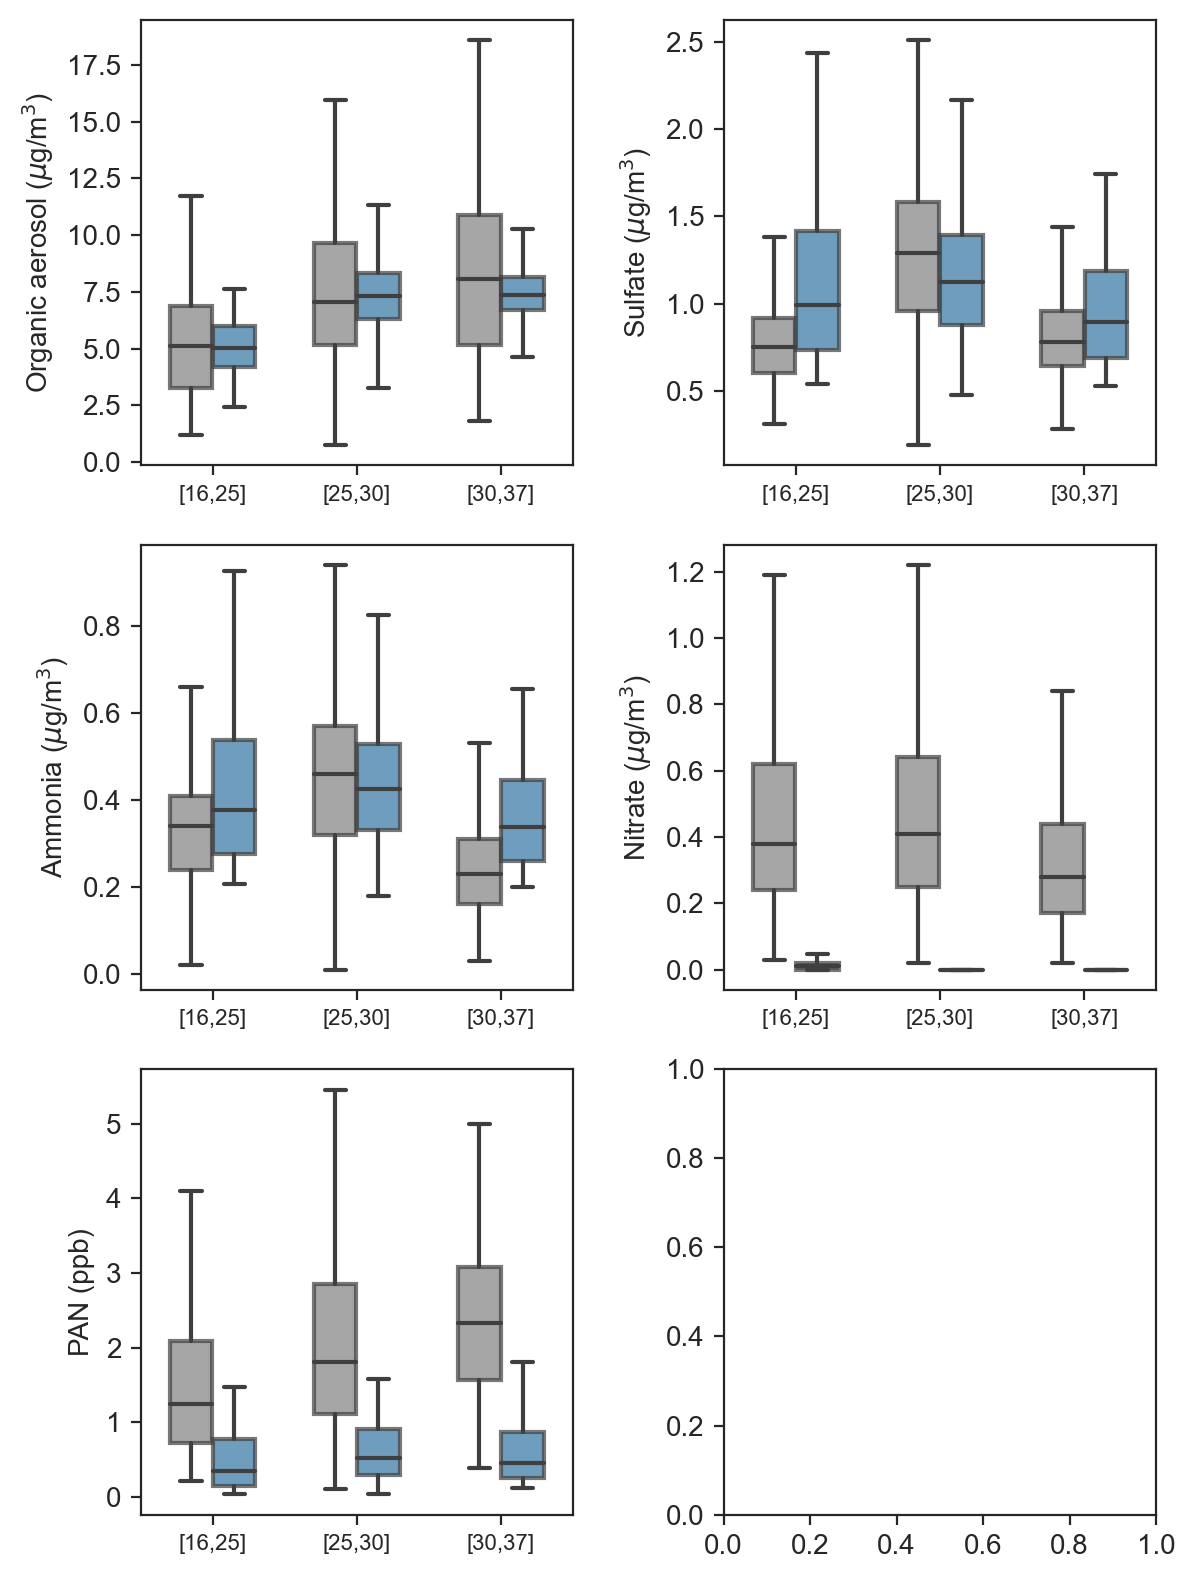

In [143]:
fig, axs = plt.subplots(3,2,figsize=(6,8),dpi=200)
plt.ioff()
sns.set_style("whitegrid")
sns.set_style("ticks")
#[0,18,20]
for i, i_spc in enumerate(range(5)):
    dim_1 = int(i/2)
    dim_2 = i - 2*dim_1
    pair_obs = species.loc[i,'col'][1]
    pair_wrf = species.loc[i,'col'][2]
    pair_model = species.loc[i,'col'][0]

    conc_df = concatenate_ground_df(pair_obs, pair_wrf, pair_model)

    bplot = sns.boxplot(x='temp_bin_index',y=pair_model, hue='tag',data=conc_df,showfliers = False, width=0.6,
                        ax=axs[dim_1,dim_2],palette=box_colors, boxprops=dict(alpha=.7))

    med_temp = conc_df.groupby('temp_bin_index').mean().reset_index()
    #axs[dim_1,dim_2].set_xticks(med_temp['temp_bin_index'], (np.rint(med_temp['temp_wrf'])).astype(int), fontsize=10)
    axs[dim_1,dim_2].set_xticks(med_temp['temp_bin_index'],['[16,25]','[25,30]','[30,37]'], fontsize=8,rotation=0)
    
    bplot.get_legend().remove()        
    axs[dim_1,dim_2].set_xlabel('')
    axs[dim_1,dim_2].set_ylabel(pair_model, fontsize=10)
plt.tight_layout()

In [489]:
len(bplot.patches)

8